In [1]:
pip install imblearn

In [2]:
# Import Libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import panel as pn
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import tensorflow as tf
pn.extension('plotly')
import plotly.express as px
import seaborn as sns
import nltk

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\jesus\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
load_dotenv()

True

In [4]:
api_key = os.getenv("GLASSNODE_API")
type(api_key)

str

In [5]:
# Define crypto currencies to pull
crypto_list = ["BTC"]

In [6]:
# Define Price URLs
price_url = 'https://api.glassnode.com/v1/metrics/market/price_usd'

In [7]:
# BTC Price API Request
btc_price_res = requests.get(price_url,
                      params={'a': 'BTC',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
btc_price_df = pd.read_json(btc_price_res.text, convert_dates=['t'])
btc_price_df.columns = ['Date', 'BTC Price']
btc_price_df.set_index('Date', inplace=True)

In [8]:
# ETH Price API Request
eth_price_res = requests.get(price_url,
                      params={'a': 'ETH',
                              'i': '24h',
                              'api_key': api_key})


# Convert price to Pandas Dataframe, set index to time and clean up file
eth_price_df = pd.read_json(eth_price_res.text, convert_dates=['t'])
eth_price_df.columns = ['Date', 'ETH Price']
eth_price_df.set_index('Date', inplace=True)

In [9]:
# Dogecoin Price from CSV
doge_data_df = pd.read_csv('Plots/DOGE-USD.csv')
doge_price_df = doge_data_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
doge_price_df.rename(columns={"Close":"Doge Price"}, inplace=True)
doge_price_df.set_index('Date', inplace=True)
# doge_price_df

## BTC Data Table Debugging

In [10]:
btc_price_df.tail()

BTC Price
Date                    
2021-05-07  57369.557999
2021-05-08  58766.584875
2021-05-09  58218.566077
2021-05-10  55824.861667
2021-05-11  55460.308769

In [11]:
# Daily change in price column
btc_daily_price_pct_change = btc_price_df.pct_change(1)
btc_daily_price_pct_change.columns = ['BTC Daily Price Change %']
btc_daily_price_pct_change = btc_daily_price_pct_change.dropna()
btc_daily_price_pct_change.tail()

BTC Daily Price Change %
Date                                
2021-05-07                  0.015647
2021-05-08                  0.024351
2021-05-09                 -0.009325
2021-05-10                 -0.041116
2021-05-11                 -0.006530

In [12]:
# Define all the different data frames into a list
btc_frames = [btc_price_df, btc_daily_price_pct_change]

# Concatenate all the dataframes into one
btc_data = pd.concat(btc_frames, axis=1, join="outer", ignore_index=False)
btc_data['BTC Daily Price Change %'] = btc_data['BTC Daily Price Change %']*100
btc_data.tail()

BTC Price  BTC Daily Price Change %
Date                                              
2021-05-07  57369.557999                  1.564744
2021-05-08  58766.584875                  2.435136
2021-05-09  58218.566077                 -0.932535
2021-05-10  55824.861667                 -4.111583
2021-05-11  55460.308769                 -0.653030

## ETH Data Table Debugging

In [13]:
eth_price_df.tail()

ETH Price
Date                   
2021-05-07  3487.489826
2021-05-08  3903.095492
2021-05-09  3932.359246
2021-05-10  3954.032924
2021-05-11  3853.051482

In [14]:
# Daily change in price column
eth_daily_price_pct_change = eth_price_df.pct_change(1)
eth_daily_price_pct_change.columns = ['ETH Daily Price Change %']
eth_daily_price_pct_change = eth_daily_price_pct_change.dropna()
eth_daily_price_pct_change.tail()

ETH Daily Price Change %
Date                                
2021-05-07                 -0.002239
2021-05-08                  0.119170
2021-05-09                  0.007498
2021-05-10                  0.005512
2021-05-11                 -0.025539

In [15]:
# Define all the different data frames into a list
eth_frames = [eth_price_df, eth_daily_price_pct_change]

# Concatenate all the dataframes into one
eth_data = pd.concat(eth_frames, axis=1, join="outer", ignore_index=False)
eth_data['ETH Daily Price Change %'] = eth_data['ETH Daily Price Change %']*100
eth_data.tail()

ETH Price  ETH Daily Price Change %
Date                                             
2021-05-07  3487.489826                 -0.223941
2021-05-08  3903.095492                 11.917043
2021-05-09  3932.359246                  0.749758
2021-05-10  3954.032924                  0.551162
2021-05-11  3853.051482                 -2.553885

## Doge Data Table Debugging

In [16]:
doge_price_df.tail()

Doge Price
Date                  
2021-05-06    0.580804
2021-05-07    0.684777
2021-05-08    0.636439
2021-05-09    0.570070
2021-05-10    0.508892

In [17]:
# Daily change in price column
doge_daily_price_pct_change = doge_price_df.pct_change(1)
doge_daily_price_pct_change.columns = ['Doge Daily Price Change %']
doge_daily_price_pct_change = doge_daily_price_pct_change.dropna()
doge_daily_price_pct_change.tail()

Doge Daily Price Change %
Date                                 
2021-05-06                  -0.116827
2021-05-07                   0.179016
2021-05-08                  -0.070589
2021-05-09                  -0.104282
2021-05-10                  -0.107317

In [18]:
# Define all the different data frames into a list
doge_frames = [doge_price_df, doge_daily_price_pct_change]

# Concatenate all the dataframes into one
doge_data = pd.concat(doge_frames, axis=1, join="outer", ignore_index=False)
doge_data['Doge Daily Price Change %'] = doge_data['Doge Daily Price Change %']*100
doge_data.reset_index(inplace=True)
doge_data.columns = ['Date', 'Doge Price', 'Doge Daily Price Change %']
doge_data['Date'] = pd.to_datetime(doge_data['Date'])
doge_data.set_index('Date', inplace=True)
doge_data.tail()

Doge Price  Doge Daily Price Change %
Date                                             
2021-05-06    0.580804                 -11.682656
2021-05-07    0.684777                  17.901564
2021-05-08    0.636439                  -7.058940
2021-05-09    0.570070                 -10.428179
2021-05-10    0.508892                 -10.731665

## Get news

In [19]:
#Bitcoin news from CSV
bitcoin_df = pd.read_csv(Path('Plots/DataNews_Ethereum.csv'))
bitcoin_df['Published Date'] = pd.to_datetime(bitcoin_df['Published Date'], exact = False, infer_datetime_format=True, format = '%Y/%m%d')
for i in bitcoin_df.index:
     bitcoin_df['Published Date'][i] = bitcoin_df['Published Date'][i].date()
bitcoin_df.columns = ['Date', 'Title', 'Content']

#Ethereum news from CSV
ethereum_df = pd.read_csv(Path('Plots/DataNews_Ethereum.csv'))
ethereum_df['Published Date'] = pd.to_datetime(ethereum_df['Published Date'], exact = False, infer_datetime_format=True, format = '%Y/%m%d')
for i in ethereum_df.index:
     ethereum_df['Published Date'][i] = ethereum_df['Published Date'][i].date()
ethereum_df.columns = ['Date', 'Title', 'Content']

#Dogecoin news from CSV
dogecoin_df = pd.read_csv(Path('Plots/DataNews_Dogecoin.csv'))
dogecoin_df['Published Date'] = pd.to_datetime(dogecoin_df['Published Date'], exact = False, infer_datetime_format=True, format = '%Y/%m%d')
for i in dogecoin_df.index:
     dogecoin_df['Published Date'][i] = dogecoin_df['Published Date'][i].date()
dogecoin_df.columns = ['Date', 'Title', 'Content']

# Bitcoin Analysis

## VADER Sentiment Analysis

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
# Create function to store the sentiment scores in DataFrame
btc_sentiments = []


for i in bitcoin_df.index:
    try:
        text = bitcoin_df["Content"][i]
        date = bitcoin_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
    
        
        btc_sentiments.append({
            "text": text,
            "Date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

    
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["Date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

Date                                               text  compound  \
0  2016-05-25  The scripting language in bitcoin is restricti...   -0.3818   
1  2016-05-27  Leading bitcoin hardware mining producer Bitma...    0.0000   
2  2016-06-08  Editor’s note: The quote “It is not possible t...    0.0000   
3  2016-06-18  A Twitter post from someone claiming to be the...    0.7632   
4  2016-06-18  Following the publication of an alleged statem...   -0.7184   

   positive  negative  neutral  
0     0.000     0.066    0.934  
1     0.000     0.000    1.000  
2     0.000     0.000    1.000  
3     0.216     0.104    0.681  
4     0.048     0.149    0.803

In [22]:
# Get descriptive stats from the DataFrame
btc_df.describe()

compound     positive     negative      neutral
count  3180.000000  3180.000000  3180.000000  3180.000000
mean      0.226278     0.075744     0.030373     0.893883
std       0.424731     0.065838     0.047066     0.075499
min      -0.941300     0.000000     0.000000     0.587000
25%       0.000000     0.000000     0.000000     0.845000
50%       0.273200     0.064000     0.000000     0.899000
75%       0.571900     0.116250     0.053000     0.948000
max       0.957100     0.336000     0.337000     1.000000

In [23]:
# set Date column to index
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.set_index('Date')

In [24]:
btc_merged = pd.merge(
    btc_df,
    btc_data,
    how='inner',
    on='Date')

btc_merged.dropna()
btc_merged.tail(20)

text  compound  \
Date                                                                      
2021-05-07  Ethereum price Today – Can Pancake Swap Eclips...    0.6908   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Ethereum’s rally halted at $3,600 and declinin...   -0.5499   
2021-05-07  \n• Ethereum Classic’s hash rate has hit an al...    0.1280   
2021-05-07  It was the so-called ‘Ethereum killers’ day to...    0.4215   
2021-05-07  NEW YORK — Ethereum has outperformed major dig...   -0.2500   
2021-05-07  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-07  NEW YORK, May 7 (Reuters) - Ethereum has outpe...   -0.2500   
2021-05-07  The second-largest cryptocurrency by market ca...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – Ethereum Cryptocurrency...    0.5574   
2021-05-08  Two words sum up Mark Cuban's love for Ethereu...    0.8625   
2021-05-08  Disclaimer: The text below is a press release ...    0.0000   
2021-05-08  \n• Ethereum has a 19% chance of hitting $6k b...    0.1280   
2021-05-08  Galax (via VideoCardz) has re-released the bra...    0.0000   
2021-05-08  NEW YORK: Ethereum has outperformed major digi...   -0.2500   
2021-05-08  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-08  Ethereum Classic has surged to a new ATH of $1...    0.0000   

            positive  negative  neutral     BTC Price  \
Date                                                    
2021-05-07     0.130     0.000    0.870  57369.557999   
2021-05-07     0.083     0.000    0.917  57369.557999   
2021-05-07     0.083     0.000    0.917  57369.557999   
2021-05-07     0.000     0.115    0.885  57369.557999   
2021-05-07     0.032     0.000    0.968  57369.557999   
2021-05-07     0.062     0.000    0.938  57369.557999   
2021-05-07     0.028     0.052    0.920  57369.557999   
2021-05-07     0.028     0.052    0.920  57369.557999   
2021-05-07     0.029     0.053    0.918  57369.557999   
2021-05-07     0.000     0.000    1.000  57369.557999   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.081     0.000    0.919  58766.584875   
2021-05-08     0.190     0.000    0.810  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.040     0.030    0.929  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   
2021-05-08     0.029     0.053    0.918  58766.584875   
2021-05-08     0.028     0.052    0.920  58766.584875   
2021-05-08     0.000     0.000    1.000  58766.584875   

            BTC Daily Price Change %  
Date                                  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-07                  1.564744  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136  
2021-05-08                  2.435136

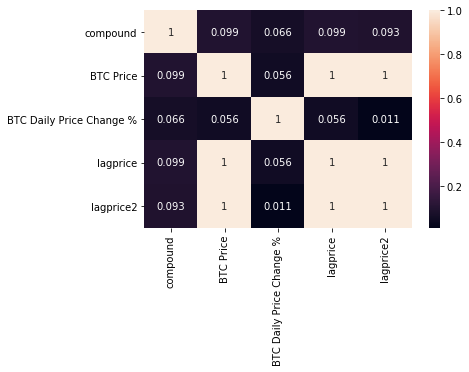

In [31]:
#set mulitple daily observations to a single mean
btc_viz_d = btc_merged.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
btc_viz_text = pd.DataFrame(btc_merged['text'].groupby('Date').apply(lambda texts: ' '.join(texts)))

btc_viz_w = btc_merged.groupby(pd.Grouper(freq='w')).mean().dropna(how='all')
btc_viz_m = btc_merged.groupby(pd.Grouper(freq='m')).mean().dropna(how='all')
btc_viz_y = btc_merged.groupby(pd.Grouper(freq='y')).mean().dropna(how='all')

btc_corr_d = btc_viz_d.drop(columns=['positive','negative','neutral'])
btc_corr_w = btc_viz_w.drop(columns=['positive','negative','neutral'])
btc_corr_m = btc_viz_m.drop(columns=['positive','negative','neutral'])
btc_corr_y = btc_viz_y.drop(columns=['positive','negative','neutral'])

btc_corr_d['lagprice'] = btc_corr_d['BTC Price'].shift(0)
btc_corr_d['lagprice2'] = btc_corr_d['BTC Price'].shift(1)

btc_corr_w['lagprice'] = btc_corr_w['BTC Price'].shift(0)
btc_corr_w['lagprice2'] = btc_corr_w['BTC Price'].shift(1)

btc_corr_m['lagprice'] = btc_corr_m['BTC Price'].shift(0)
btc_corr_m['lagprice2'] = btc_corr_m['BTC Price'].shift(1)

btc_corr_y['lagprice'] = btc_corr_y['BTC Price'].shift(0)
btc_corr_y['lagprice2'] = btc_corr_y['BTC Price'].shift(1)

btc_heat_d = sns.heatmap(btc_corr_d.corr(), annot = True)
btc_hfig_d = btc_heat_d.get_figure()
btc_hfig_d.savefig('Plots/btc_heat_d.png')

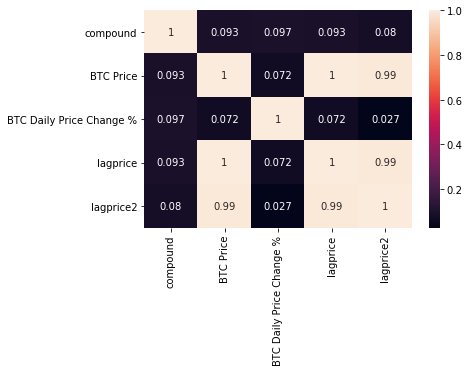

In [32]:
btc_heat_w = sns.heatmap(btc_corr_w.corr(), annot = True)
btc_hfig_w = btc_heat_w.get_figure()
btc_hfig_w.savefig('Plots/btc_heat_w.png')


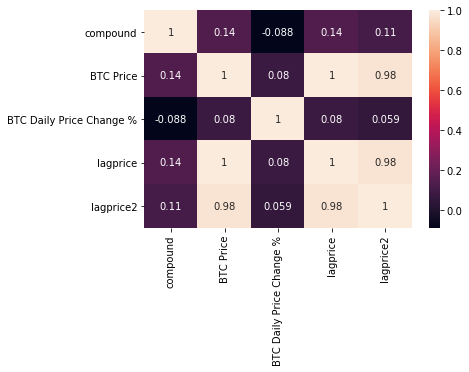

In [33]:
btc_heat_m = sns.heatmap(btc_corr_m.corr(), annot = True)
btc_hfig_m = btc_heat_m.get_figure()
btc_hfig_m.savefig('Plots/btc_heat_m.png')


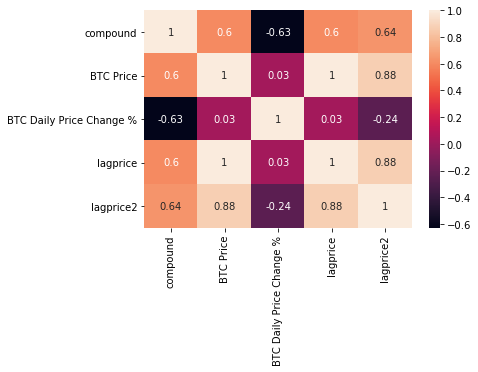

In [34]:
btc_heat_y = sns.heatmap(btc_corr_y.corr(), annot = True)
btc_hfig_y = btc_heat_y.get_figure()
btc_hfig_y.savefig('Plots/btc_heat_y.png')

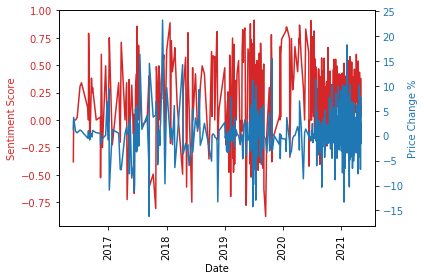

In [48]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(btc_viz_d['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(btc_viz_d['BTC Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

btc_lfig_d = ax2.get_figure()
btc_lfig_d.savefig('Plots/btc_lines_d.png')
plt.show()

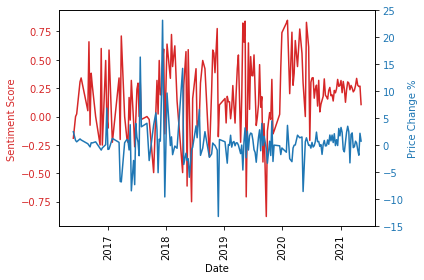

In [98]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(btc_viz_w['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(btc_viz_w['BTC Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

btc_lfig_w = ax2.get_figure()
btc_lfig_w.savefig('Plots/btc_lines_w.png')
plt.show()

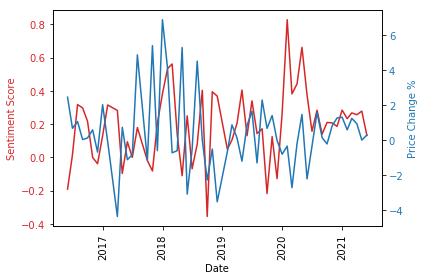

In [96]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(btc_viz_m['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(btc_viz_m['BTC Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

btc_lfig = ax2.get_figure()
btc_lfig.savefig('Plots/btc_lines_m.png')
plt.show()

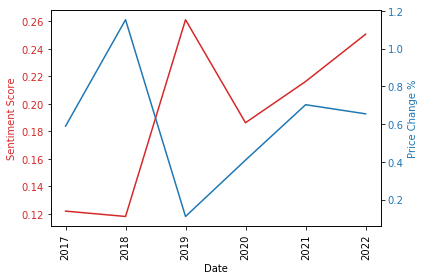

In [51]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(btc_viz_y['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(btc_viz_y['BTC Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

btc_lfig = ax2.get_figure()
btc_lfig.savefig('Plots/btc_lines_y.png')
plt.show()

## Build a predictive Model with Vader

In [26]:
# Add in a binary classifier for positive and negative price changes
btc_merged['target'] = np.where(btc_merged['BTC Daily Price Change %'] >= 0, 1, 0)

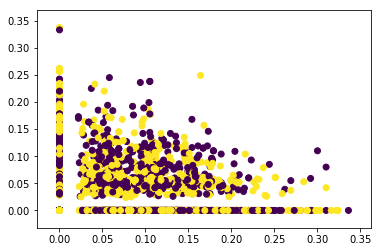

In [27]:
X = btc_merged["text"]
y = btc_merged["target"]

# Split data into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Visualize the data
btc_scatter = plt.scatter(btc_merged['positive'],btc_merged['negative'], c=y)
btc_sfig = btc_scatter.get_figure()
btc_sfig.savefig('Plots/btc_scatter.png')

In [28]:
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [29]:
# Check dimensions
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['target'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['target'].value_counts())

Train: 1788 rows and 2 columns
1    1021
0     767
Name: target, dtype: int64

Test: 795 rows and 2 columns
1    462
0    333
Name: target, dtype: int64


In [30]:
train[['neg', 'neu', 'pos', 'compound']] = train['text'].apply(analyzer.polarity_scores).apply(pd.Series)
train.head()

text  target    neg  \
Date                                                                           
2020-12-17  Analytics blockchain The Graph is now live on ...       1  0.000   
2020-10-24  Bitcoin has seen a strong price increase of 13...       1  0.000   
2021-01-14  Ethereum nears “vital” point which could give ...       1  0.056   
2020-08-13  It was a match made in Silicon Valley heaven. ...       1  0.000   
2021-04-30  The unending rally of Ethereum came when the o...       1  0.104   

              neu    pos  compound  
Date                                
2020-12-17  0.949  0.051    0.2732  
2020-10-24  0.833  0.167    0.7906  
2021-01-14  0.878  0.066    0.1280  
2020-08-13  0.835  0.165    0.8176  
2021-04-30  0.896  0.000   -0.5994

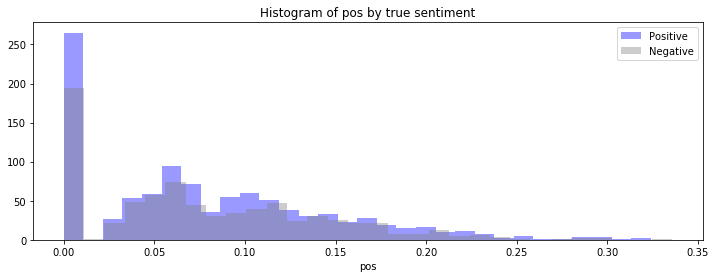

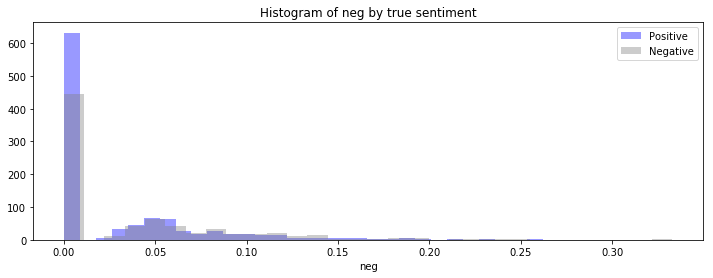

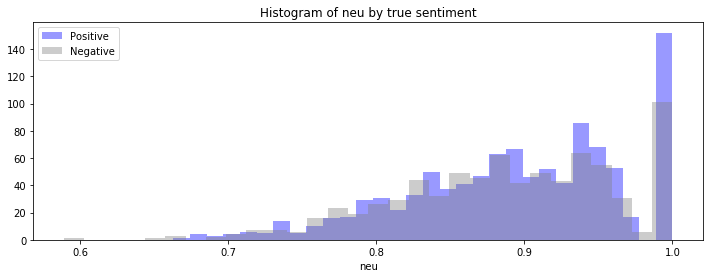

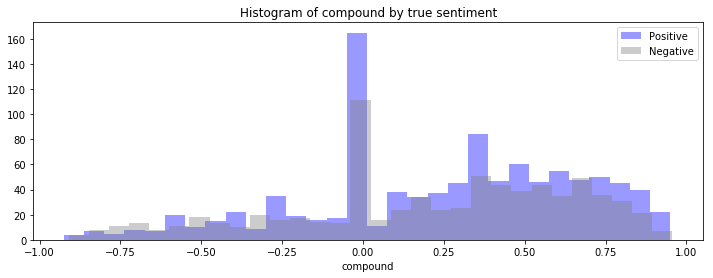

In [31]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("target==1")[var], bins=30, kde=False, 
                 color='blue', label='Positive')
    sns.distplot(train.query("target==0")[var], bins=30, kde=False, 
                 color='gray', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig("Plots/btc_"+str(var)+".png");

# Ethereum Analysis

## VADER Sentiment Analysis

In [55]:
# Create function to store the sentiment scores in DataFrame
eth_sentiments = []


for i in ethereum_df.index:
    try:
        text = ethereum_df["Content"][i]
        date = ethereum_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
    
        
        eth_sentiments.append({
            "text": text,
            "Date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

    
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

Date                                               text  compound  \
0  2016-05-25  The scripting language in bitcoin is restricti...   -0.3818   
1  2016-05-27  Leading bitcoin hardware mining producer Bitma...    0.0000   
2  2016-06-08  Editor’s note: The quote “It is not possible t...    0.0000   
3  2016-06-18  A Twitter post from someone claiming to be the...    0.7632   
4  2016-06-18  Following the publication of an alleged statem...   -0.7184   

   positive  negative  neutral  
0     0.000     0.066    0.934  
1     0.000     0.000    1.000  
2     0.000     0.000    1.000  
3     0.216     0.104    0.681  
4     0.048     0.149    0.803

In [56]:
# Get descriptive stats from the DataFrame
eth_df.describe()

compound     positive     negative      neutral
count  3180.000000  3180.000000  3180.000000  3180.000000
mean      0.226278     0.075744     0.030373     0.893883
std       0.424731     0.065838     0.047066     0.075499
min      -0.941300     0.000000     0.000000     0.587000
25%       0.000000     0.000000     0.000000     0.845000
50%       0.273200     0.064000     0.000000     0.899000
75%       0.571900     0.116250     0.053000     0.948000
max       0.957100     0.336000     0.337000     1.000000

In [57]:
# set Date column to index
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df = eth_df.set_index('Date')

In [58]:
eth_merged = pd.merge(
    eth_df,
    eth_data,
    how='inner',
    on='Date')

eth_merged.dropna()
eth_merged.tail(20)

text  compound  \
Date                                                                      
2021-05-07  Ethereum price Today – Can Pancake Swap Eclips...    0.6908   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Megan Kaspar, Magnetic Managing Director and C...    0.2023   
2021-05-07  Ethereum’s rally halted at $3,600 and declinin...   -0.5499   
2021-05-07  \n• Ethereum Classic’s hash rate has hit an al...    0.1280   
2021-05-07  It was the so-called ‘Ethereum killers’ day to...    0.4215   
2021-05-07  NEW YORK — Ethereum has outperformed major dig...   -0.2500   
2021-05-07  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-07  NEW YORK, May 7 (Reuters) - Ethereum has outpe...   -0.2500   
2021-05-07  The second-largest cryptocurrency by market ca...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – VanEck Files For First ...    0.0000   
2021-05-08  Ethereum price Today – Ethereum Cryptocurrency...    0.5574   
2021-05-08  Two words sum up Mark Cuban's love for Ethereu...    0.8625   
2021-05-08  Disclaimer: The text below is a press release ...    0.0000   
2021-05-08  \n• Ethereum has a 19% chance of hitting $6k b...    0.1280   
2021-05-08  Galax (via VideoCardz) has re-released the bra...    0.0000   
2021-05-08  NEW YORK: Ethereum has outperformed major digi...   -0.2500   
2021-05-08  Ethereum has outperformed major digital curren...   -0.2500   
2021-05-08  Ethereum Classic has surged to a new ATH of $1...    0.0000   

            positive  negative  neutral    ETH Price  ETH Daily Price Change %  
Date                                                                            
2021-05-07     0.130     0.000    0.870  3487.489826                 -0.223941  
2021-05-07     0.083     0.000    0.917  3487.489826                 -0.223941  
2021-05-07     0.083     0.000    0.917  3487.489826                 -0.223941  
2021-05-07     0.000     0.115    0.885  3487.489826                 -0.223941  
2021-05-07     0.032     0.000    0.968  3487.489826                 -0.223941  
2021-05-07     0.062     0.000    0.938  3487.489826                 -0.223941  
2021-05-07     0.028     0.052    0.920  3487.489826                 -0.223941  
2021-05-07     0.028     0.052    0.920  3487.489826                 -0.223941  
2021-05-07     0.029     0.053    0.918  3487.489826                 -0.223941  
2021-05-07     0.000     0.000    1.000  3487.489826                 -0.223941  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.081     0.000    0.919  3903.095492                 11.917043  
2021-05-08     0.190     0.000    0.810  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.040     0.030    0.929  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043  
2021-05-08     0.029     0.053    0.918  3903.095492                 11.917043  
2021-05-08     0.028     0.052    0.920  3903.095492                 11.917043  
2021-05-08     0.000     0.000    1.000  3903.095492                 11.917043

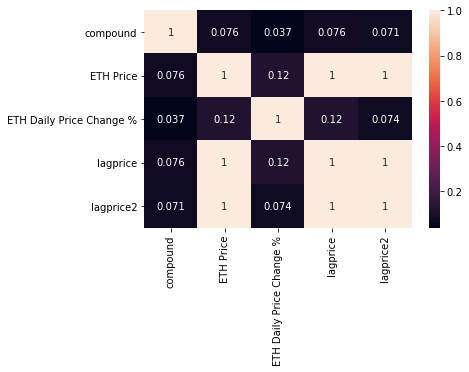

In [76]:
#set mulitple daily observations to a single mean
eth_viz_d = eth_merged.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
eth_viz_text = pd.DataFrame(eth_merged['text'].groupby('Date').apply(lambda texts: ' '.join(texts)))

eth_viz_w = eth_merged.groupby(pd.Grouper(freq='w')).mean().dropna(how='all')
eth_viz_m = eth_merged.groupby(pd.Grouper(freq='m')).mean().dropna(how='all')
eth_viz_y = eth_merged.groupby(pd.Grouper(freq='y')).mean().dropna(how='all')

eth_corr_d = eth_viz_d.drop(columns=['positive','negative','neutral'])
eth_corr_w = eth_viz_w.drop(columns=['positive','negative','neutral'])
eth_corr_m = eth_viz_m.drop(columns=['positive','negative','neutral'])
eth_corr_y = eth_viz_y.drop(columns=['positive','negative','neutral'])

eth_corr_d['lagprice'] = eth_corr_d['ETH Price'].shift(0)
eth_corr_d['lagprice2'] = eth_corr_d['ETH Price'].shift(1)

eth_corr_w['lagprice'] = eth_corr_w['ETH Price'].shift(0)
eth_corr_w['lagprice2'] = eth_corr_w['ETH Price'].shift(1)

eth_corr_m['lagprice'] = eth_corr_m['ETH Price'].shift(0)
eth_corr_m['lagprice2'] = eth_corr_m['ETH Price'].shift(1)

eth_corr_y['lagprice'] = eth_corr_y['ETH Price'].shift(0)
eth_corr_y['lagprice2'] = eth_corr_y['ETH Price'].shift(1)

eth_heat_d = sns.heatmap(eth_corr_d.corr(), annot = True)
eth_hfig_d = eth_heat_d.get_figure()
eth_hfig_d.savefig('Plots/eth_heat_d.png')

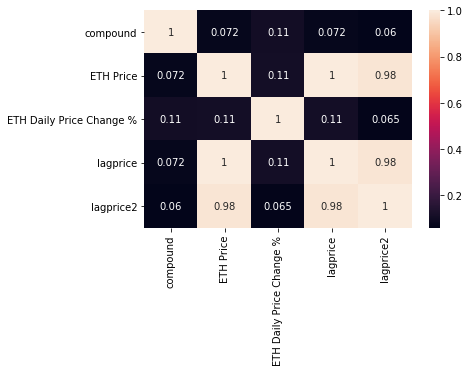

In [65]:
eth_heat_w = sns.heatmap(eth_corr_w.corr(), annot = True)
eth_hfig_w = eth_heat_w.get_figure()
eth_hfig_w.savefig('Plots/eth_heat_w.png')

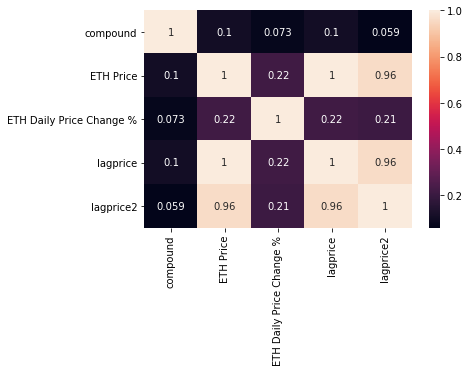

In [66]:
eth_heat_m = sns.heatmap(eth_corr_m.corr(), annot = True)
eth_hfig_m = eth_heat_m.get_figure()
eth_hfig_m.savefig('Plots/eth_heat_m.png')

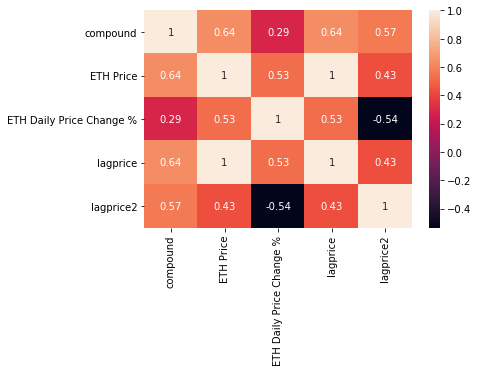

In [67]:
eth_heat_y = sns.heatmap(eth_corr_y.corr(), annot = True)
eth_hfig_y = eth_heat_y.get_figure()
eth_hfig_y.savefig('Plots/eth_heat_y.png')

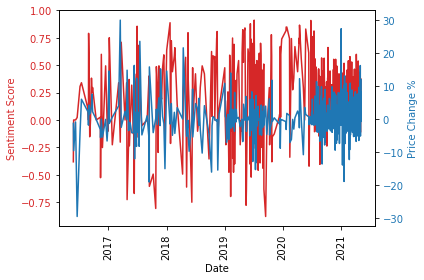

In [68]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(eth_viz_d['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(eth_viz_d['ETH Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

eth_lfig = ax2.get_figure()
eth_lfig.savefig('Plots/eth_lines_d.png')
plt.show()

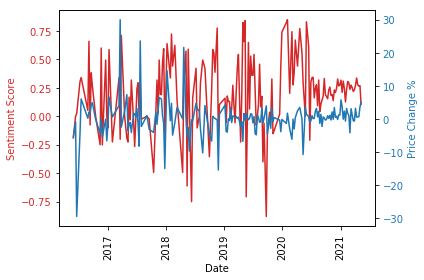

In [69]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(eth_viz_w['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(eth_viz_w['ETH Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

eth_lfig = ax2.get_figure()
eth_lfig.savefig('Plots/eth_lines_w.png')
plt.show()

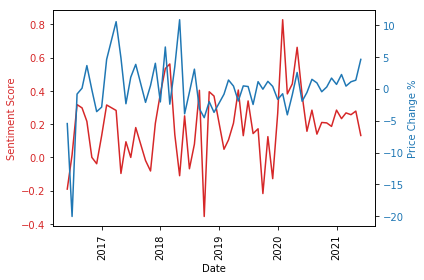

In [70]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(eth_viz_m['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(eth_viz_m['ETH Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

eth_lfig = ax2.get_figure()
eth_lfig.savefig('Plots/eth_lines_m.png')
plt.show()

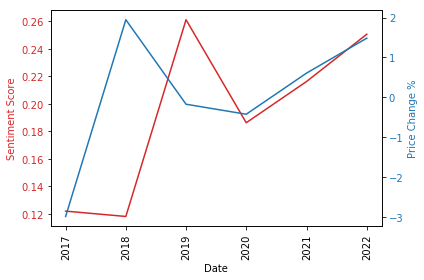

In [71]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(eth_viz_y['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(eth_viz_y['ETH Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

eth_lfig = ax2.get_figure()
eth_lfig.savefig('Plots/eth_lines_y.png')
plt.show()

## Build a predictive Model with Vader

In [66]:
# Add in a binary classifier for positive and negative price changes
eth_merged['target'] = np.where(eth_merged['ETH Daily Price Change %'] >= 0, 1, 0)

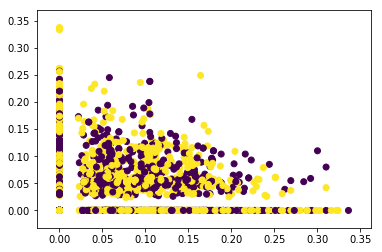

In [67]:
X = eth_merged["text"]
y = eth_merged["target"]

# Split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Visualize the data
eth_scatter = plt.scatter(eth_merged['positive'],eth_merged['negative'], c=y)
eth_sfig = eth_scatter.get_figure()
eth_sfig.savefig('Plots/eth_scatter.png')

In [68]:
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [69]:
# Check dimensions
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['target'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['target'].value_counts())

Train: 1788 rows and 2 columns
1    1063
0     725
Name: target, dtype: int64

Test: 795 rows and 2 columns
1    464
0    331
Name: target, dtype: int64


In [70]:
train[['neg', 'neu', 'pos', 'compound']] = train['text'].apply(analyzer.polarity_scores).apply(pd.Series)
train.head()

text  target    neg  \
Date                                                                           
2020-07-01  When the inventor of AWS Lambda, Tim Wagner, a...       1  0.000   
2021-01-13  Eyes were anxiously set on a new all-time high...       1  0.104   
2021-01-24  Cosmos (ATOM) price has rallied over 7% today ...       1  0.063   
2019-07-08  In the past 24 hours, the price of ether, the ...       1  0.000   
2020-12-22  Bitfinex Derivatives, a derivatives platform a...       1  0.000   

              neu    pos  compound  
Date                                
2020-07-01  0.823  0.177    0.8316  
2021-01-13  0.857  0.039   -0.5003  
2021-01-24  0.937  0.000   -0.4019  
2019-07-08  0.861  0.139    0.7003  
2020-12-22  1.000  0.000    0.0000

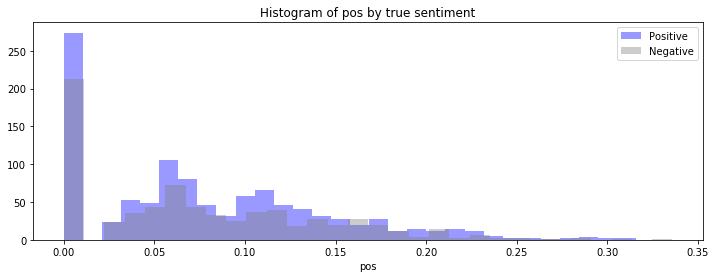

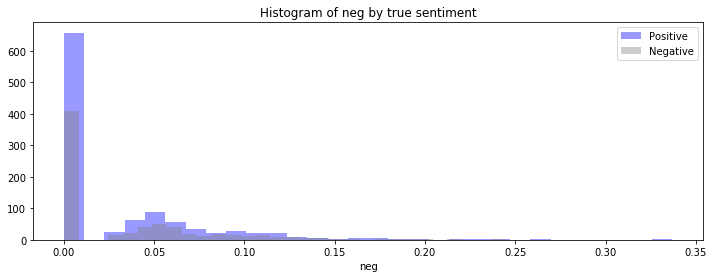

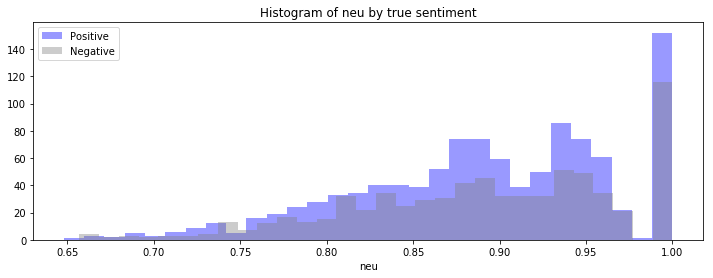

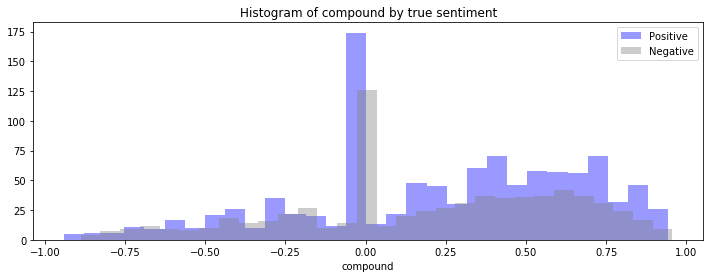

In [71]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("target==1")[var], bins=30, kde=False, 
                 color='blue', label='Positive')
    sns.distplot(train.query("target==0")[var], bins=30, kde=False, 
                 color='gray', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig("Plots/eth_"+str(var)+".png");

## Build a Predictive Model with RNN LSTM

In [104]:
# Import the Tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [105]:
# Create an instance of the Tokenizer and fit it with the X text data
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [106]:
# Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'the', token: 1
word: 'to', token: 2
word: 'a', token: 3
word: 'chars', token: 4
word: 'ethereum', token: 5


In [107]:
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)

In [108]:
# Contrast a sample numerical sequence with its text version
print("**Text comment**")
print({X[0]})

**Text comment**
{'The scripting language in bitcoin is restricting application development, which is something that Ethereum can change, according to Fred Ehrsam, co-founder of Coinbase, which recently added Ethereum trading.\n\nEhrsam, writing in Medium, noted that in  ... [+11143 chars]'}


In [109]:
print("**Numerical sequence representation**")
print(X_seq[0])

**Numerical sequence representation**
[1, 6500, 1251, 8, 12, 9, 4436, 995, 397, 47, 9, 874, 14, 5, 99, 707, 66, 2, 4437, 4438, 227, 213, 6, 320, 47, 129, 708, 5, 52, 4438, 347, 8, 1721, 748, 14, 8, 6501, 4]


In [110]:
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the pad size
max_words = 140

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")

In [111]:
# Creating training, validation, and testing sets using the encoded data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [117]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [118]:
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 64

In [119]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

In [120]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [121]:
# Show model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 140, 64)           796672    
_________________________________________________________________
lstm_1 (LSTM)                (None, 280)               386400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 281       
Total params: 1,183,353
Trainable params: 1,183,353
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Training the model
batch_size = 1000
epochs = 10
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
2/2 [==============================] - 8s 3s/step - loss: 0.6908 - accuracy: 0.4620 - tp: 314.6667 - tn: 405.0000 - fp: 210.6667 - fn: 595.0000 - precision: 0.3993 - recall: 0.2949 - auc: 0.5014 - val_loss: 0.6865 - val_accuracy: 0.5578 - val_tp: 333.0000 - val_tn: 0.0000e+00 - val_fp: 264.0000 - val_fn: 0.0000e+00 - val_precision: 0.5578 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/10
2/2 [==============================] - 5s 3s/step - loss: 0.6766 - accuracy: 0.5955 - tp: 909.0000 - tn: 0.0000e+00 - fp: 616.3333 - fn: 0.0000e+00 - precision: 0.5955 - recall: 1.0000 - auc: 0.5029 - val_loss: 0.7072 - val_accuracy: 0.5578 - val_tp: 333.0000 - val_tn: 0.0000e+00 - val_fp: 264.0000 - val_fn: 0.0000e+00 - val_precision: 0.5578 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/10
2/2 [==============================] - 5s 3s/step - loss: 0.6819 - accuracy: 0.5945 - tp: 908.0000 - tn: 0.0000e+00 - fp: 617.3333 - fn: 0.0000e+00 - precision: 0.5945 - recall: 1.0000 - auc: 0.4948 - va

In [123]:
# Predict classes using the testing data
y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=1000)

## Model Comparison

In [124]:
# Import relevant libraries from sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [125]:
#VADER - polarity model
train['vader_polarity'] = np.where(train['pos']>train['neg'], 1, 0)
target_names=['negative', 'positive']
print("Classification Report for the VADER Sentiment Model using polarity scores")
print(classification_report(train['target'], 
                            train['vader_polarity'], 
                            target_names=target_names))

Classification Report for the VADER Sentiment Model using polarity scores
              precision    recall  f1-score   support

    negative       0.44      0.41      0.43       725
    positive       0.62      0.65      0.63      1063

    accuracy                           0.55      1788
   macro avg       0.53      0.53      0.53      1788
weighted avg       0.55      0.55      0.55      1788



In [126]:
#VADER - compound model
train['vader_compound'] = np.where(train['compound']>0, 1, 0)
print("Classification Report for the VADER Sentiment Model using compound scores")
print(classification_report(train['target'], 
                            train['vader_compound'], 
                            target_names=target_names))

Classification Report for the VADER Sentiment Model using compound scores
              precision    recall  f1-score   support

    negative       0.44      0.41      0.43       725
    positive       0.62      0.64      0.63      1063

    accuracy                           0.55      1788
   macro avg       0.53      0.53      0.53      1788
weighted avg       0.54      0.55      0.55      1788



In [127]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75       795

    accuracy                           0.60       795
   macro avg       0.50      0.30      0.37       795
weighted avg       1.00      0.60      0.75       795



## Confusion Matrices

In [128]:
# Create function we can call for all models
def plot_cm(y_test, y_pred, target_names=['negative', 'positive'], 
            figsize=(5,3)):
    """Create a labelled confusion matrix plot."""
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False, 
                ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted')
    ax.set_xticklabels(target_names)
    ax.set_ylabel('Actual')
    ax.set_yticklabels(target_names, 
                       fontdict={'verticalalignment': 'center'});

Confusion Matrix from the VADER model using polarity scores


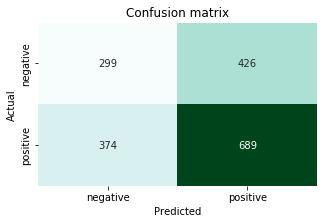

In [129]:
# Plot confusion matrix for VADER using polarity scores
print("Confusion Matrix from the VADER model using polarity scores")
plot_cm(train['target'], train['vader_polarity'])

Confusion Matrix from the VADER model using compound scores


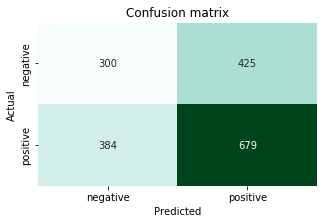

In [130]:
print("Confusion Matrix from the VADER model using compound scores")
plot_cm(train['target'], train['vader_compound'])

Confusion Matrix from the RNN LSTM Model


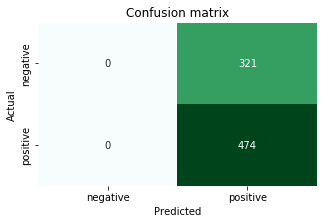

In [131]:
print("Confusion Matrix from the RNN LSTM Model")
plot_cm(y_test_rnn, y_rnn_pred)

# Dogecoin Analysis

## VADER Sentiment Analysis

In [72]:
# Create function to store the sentiment scores in DataFrame
doge_sentiments = []


for i in dogecoin_df.index:
    try:
        text = dogecoin_df["Content"][i]
        date = dogecoin_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
    
        
        doge_sentiments.append({
            "text": text,
            "Date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

    
    
# Create DataFrame
doge_df = pd.DataFrame(doge_sentiments)

# Reorder DataFrame columns
cols = ["Date", "text", "compound", "positive", "negative", "neutral"]
doge_df = doge_df[cols]

doge_df.head()

Date                                               text  compound  \
0  2017-09-15  Jackson Palmer, creator of Dogecoin, in San Fr...   -0.6059   
1  2017-11-08  The controversial SegWit2x fork has been suspe...   -0.7351   
2  2018-01-25  Messaging app Telegram started out as a WhatsA...   -0.5023   
3  2018-10-20  The startup is behind the Emma app for iOS and...    0.5859   
4  2019-04-25  By CCN: As bitcoin’s price experienced a surge...    0.8070   

   positive  negative  neutral  
0     0.098     0.169    0.733  
1     0.000     0.163    0.837  
2     0.000     0.083    0.917  
3     0.148     0.047    0.805  
4     0.175     0.000    0.825

In [73]:
# Get descriptive stats from the DataFrame
doge_df.describe()

compound     positive     negative      neutral
count  1320.000000  1320.000000  1320.000000  1320.000000
mean      0.263925     0.079610     0.027657     0.892736
std       0.417506     0.070063     0.044600     0.078820
min      -0.888500     0.000000     0.000000     0.563000
25%       0.000000     0.000000     0.000000     0.842000
50%       0.327500     0.065000     0.000000     0.901000
75%       0.612400     0.121000     0.048000     0.949000
max       0.979600     0.437000     0.262000     1.000000

In [74]:
# set Date column to index
doge_df['Date'] = pd.to_datetime(doge_df['Date'])
doge_df = doge_df.set_index('Date')

In [75]:
doge_merged = pd.merge(
    doge_df,
    doge_data,
    how='inner',
    on='Date')

doge_merged.dropna()
doge_merged.tail(20)

text  compound  \
Date                                                                      
2021-05-07  now Make the most of your money by signing up ...    0.0000   
2021-05-07  now Make the most of your money by signing up ...    0.0000   
2021-05-07  Dogecoin has made several attempts to settle b...    0.8658   
2021-05-07  WEST PALM BEACH, Fla. — Your social media feed...    0.5584   
2021-05-07  Get daily crypto briefings and weekly Bitcoin ...    0.0000   
2021-05-07  Dogecoin slid by 11.15% on Thursday. Reversing...    0.4215   
2021-05-07  Falling short of the first major resistance le...   -0.2023   
2021-05-07  Dogecoin surged by 22% on 5th May to record a ...    0.1901   
2021-05-07  WEST PALM BEACH, Fla. — Your social media feed...    0.5584   
2021-05-07  “I’m just a dude,” Jasyn Prolifiq said. Prolif...    0.5719   
2021-05-08  Dogecoin is reaching all new levels, but the q...    0.9070   
2021-05-08  Dogecoin investors remain curious of a “whale”...   -0.4215   
2021-05-08  Dogecoin — the meme-based cryptocurrency — is ...    0.6908   
2021-05-08  \n• Dogecoin (DOGE) recently hit over an $85 b...    0.0000   
2021-05-08  Maybe your friends or co-workers are telling y...    0.3197   
2021-05-08  Dogecoin (DOGE) now has an impressive market c...    0.5106   
2021-05-08  Elon Musk has urged people to take “caution” w...    0.4588   
2021-05-08  \n• Dogecoin's spectacular rise this year has ...    0.0772   
2021-05-08  The cryptocurrency fell almost 8% in the past ...    0.5267   
2021-05-08  The cryptocurrency fell almost 8% in the past ...    0.5267   

            positive  negative  neutral  Doge Price  Doge Daily Price Change %  
Date                                                                            
2021-05-07     0.000     0.000    1.000    0.684777                  17.901564  
2021-05-07     0.000     0.000    1.000    0.684777                  17.901564  
2021-05-07     0.195     0.000    0.805    0.684777                  17.901564  
2021-05-07     0.117     0.047    0.837    0.684777                  17.901564  
2021-05-07     0.115     0.094    0.791    0.684777                  17.901564  
2021-05-07     0.072     0.034    0.894    0.684777                  17.901564  
2021-05-07     0.101     0.135    0.763    0.684777                  17.901564  
2021-05-07     0.036     0.000    0.964    0.684777                  17.901564  
2021-05-07     0.117     0.047    0.837    0.684777                  17.901564  
2021-05-07     0.078     0.000    0.922    0.684777                  17.901564  
2021-05-08     0.236     0.000    0.764    0.636439                  -7.058940  
2021-05-08     0.049     0.108    0.844    0.636439                  -7.058940  
2021-05-08     0.157     0.000    0.843    0.636439                  -7.058940  
2021-05-08     0.000     0.000    1.000    0.636439                  -7.058940  
2021-05-08     0.112     0.087    0.801    0.636439                  -7.058940  
2021-05-08     0.078     0.000    0.922    0.636439                  -7.058940  
2021-05-08     0.068     0.000    0.932    0.636439                  -7.058940  
2021-05-08     0.056     0.049    0.894    0.636439                  -7.058940  
2021-05-08     0.067     0.000    0.933    0.636439                  -7.058940  
2021-05-08     0.067     0.000    0.933    0.636439                  -7.058940

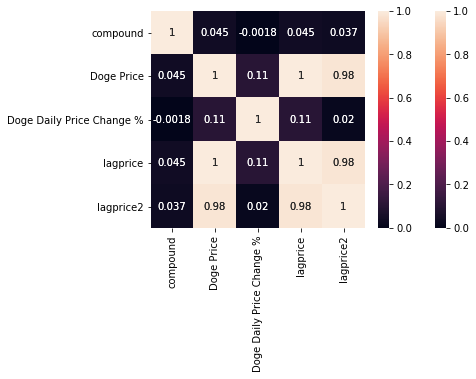

In [81]:
#set mulitple daily observations to a single mean
doge_viz_d = doge_merged.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
doge_viz_text = pd.DataFrame(doge_merged['text'].groupby('Date').apply(lambda texts: ' '.join(texts)))

doge_viz_w = doge_merged.groupby(pd.Grouper(freq='w')).mean().dropna(how='all')
doge_viz_m = doge_merged.groupby(pd.Grouper(freq='m')).mean().dropna(how='all')
doge_viz_y = doge_merged.groupby(pd.Grouper(freq='y')).mean().dropna(how='all')

doge_corr_d = doge_viz_d.drop(columns=['positive','negative','neutral'])
doge_corr_w = doge_viz_w.drop(columns=['positive','negative','neutral'])
doge_corr_m = doge_viz_m.drop(columns=['positive','negative','neutral'])
doge_corr_y = doge_viz_y.drop(columns=['positive','negative','neutral'])

doge_corr_d['lagprice'] = doge_corr_d['Doge Price'].shift(0)
doge_corr_d['lagprice2'] = doge_corr_d['Doge Price'].shift(1)

doge_corr_w['lagprice'] = doge_corr_w['Doge Price'].shift(0)
doge_corr_w['lagprice2'] = doge_corr_w['Doge Price'].shift(1)

doge_corr_m['lagprice'] = doge_corr_m['Doge Price'].shift(0)
doge_corr_m['lagprice2'] = doge_corr_m['Doge Price'].shift(1)

doge_corr_y['lagprice'] = doge_corr_y['Doge Price'].shift(0)
doge_corr_y['lagprice2'] = doge_corr_y['Doge Price'].shift(1)

doge_heat_d = sns.heatmap(doge_corr_d.corr(), annot = True)
doge_hfig_d = doge_heat_d.get_figure()
doge_hfig_d.savefig('Plots/doge_heat_d.png')

doge_heat_d = sns.heatmap(doge_corr_d.corr(), annot = True)
doge_hfig_d = doge_heat_d.get_figure()
doge_hfig_d.savefig('Plots/doge_heat_d.png')

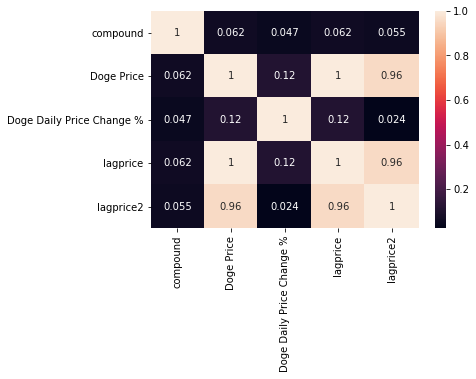

In [82]:
doge_heat_w = sns.heatmap(doge_corr_w.corr(), annot = True)
doge_hfig_w = doge_heat_w.get_figure()
doge_hfig_w.savefig('Plots/doge_heat_w.png')

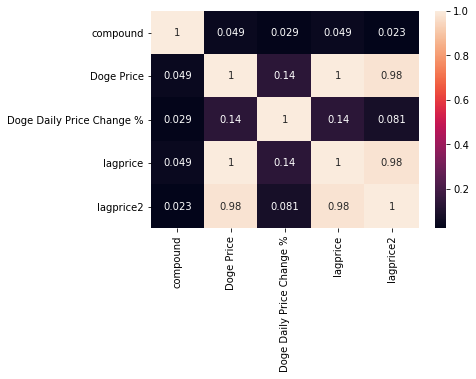

In [83]:
doge_heat_m = sns.heatmap(doge_corr_m.corr(), annot = True)
doge_hfig_m = doge_heat_m.get_figure()
doge_hfig_m.savefig('Plots/doge_heat_m.png')

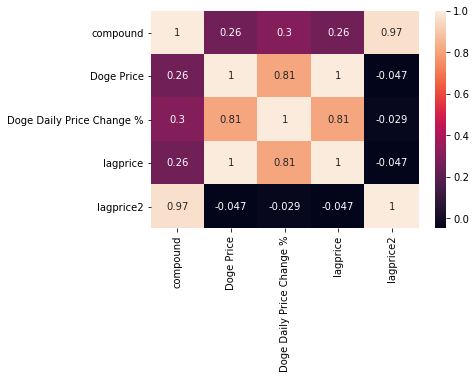

In [84]:
doge_heat_y = sns.heatmap(doge_corr_y.corr(), annot = True)
doge_hfig_y = doge_heat_y.get_figure()
doge_hfig_y.savefig('Plots/doge_heat_y.png')

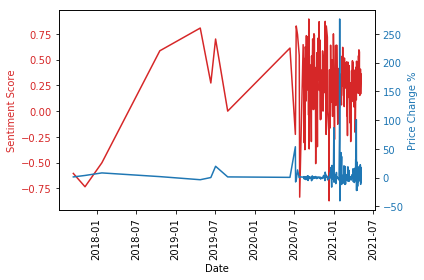

In [90]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(doge_viz_d['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(doge_viz_d['Doge Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

doge_lfig = ax2.get_figure()
doge_lfig.savefig('Plots/doge_lines_d.png')
plt.show()

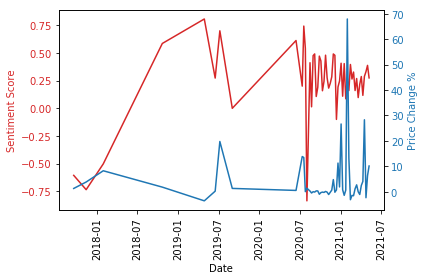

In [91]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(doge_viz_w['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(doge_viz_w['Doge Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

doge_lfig = ax2.get_figure()
doge_lfig.savefig('Plots/doge_lines_w.png')
plt.show()

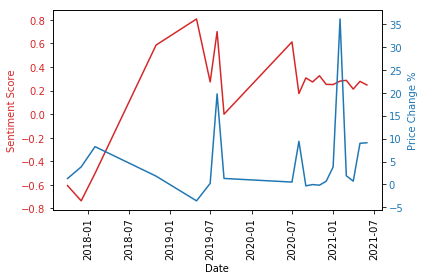

In [92]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(doge_viz_m['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(doge_viz_m['Doge Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

doge_lfig = ax2.get_figure()
doge_lfig.savefig('Plots/doge_lines_m.png')
plt.show()

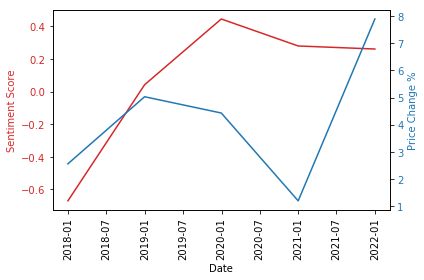

In [93]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(doge_viz_y['compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(doge_viz_y['Doge Daily Price Change %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

doge_lfig = ax2.get_figure()
doge_lfig.savefig('Plots/doge_lines_y.png')
plt.show()

## Build a predictive Model with Vader

In [138]:
# Add in a binary classifier for positive and negative price changes
doge_merged['target'] = np.where(doge_merged['Doge Daily Price Change %'] >= 0, 1, 0)

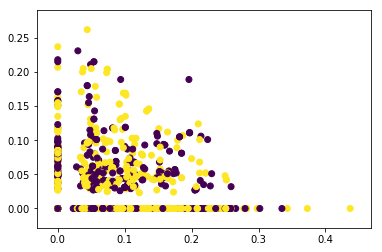

In [139]:
X = doge_merged["text"]
y = doge_merged["target"]

# Split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

# Visualize the data
doge_scatter = plt.scatter(doge_merged['positive'],doge_merged['negative'], c=y)
doge_sfig = doge_scatter.get_figure()
doge_sfig.savefig('Plots/doge_scatter.png')

In [140]:
# Append sentiment back using indices
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [141]:
# Check dimensions
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['target'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['target'].value_counts())

Train: 742 rows and 2 columns
1    398
0    344
Name: target, dtype: int64

Test: 330 rows and 2 columns
0    167
1    163
Name: target, dtype: int64


In [142]:
train[['neg', 'neu', 'pos', 'compound']] = train['text'].apply(analyzer.polarity_scores).apply(pd.Series)
train.head()

text  target    neg  \
Date                                                                           
2021-04-16  has spiked 400% in a week, making it one of th...       1  0.059   
2020-09-10  Digital Coin Market Is Booming Worldwide | Bit...       1  0.000   
2021-04-02  Dogecoin trading activities surged over 10 per...       0  0.000   
2021-02-12  “ “People are talking about Dogecoin going to ...       1  0.000   
2020-09-15  The Securities and Exchange Commission announc...       1  0.117   

              neu    pos  compound  
Date                                
2021-04-16  0.861  0.080    0.0000  
2020-09-10  1.000  0.000    0.0000  
2021-04-02  0.941  0.059    0.3612  
2021-02-12  1.000  0.000    0.0000  
2020-09-15  0.732  0.151    0.1027

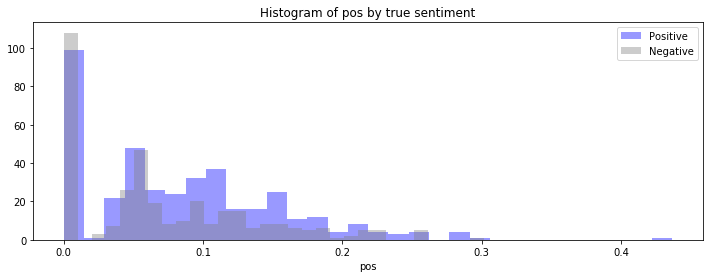

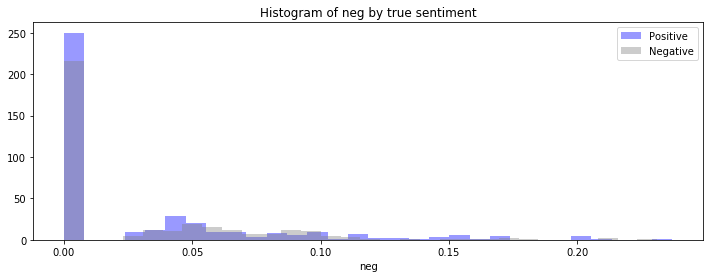

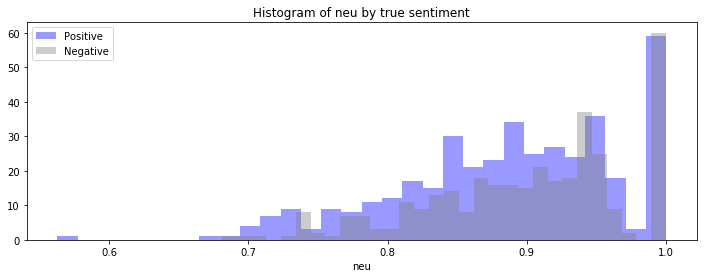

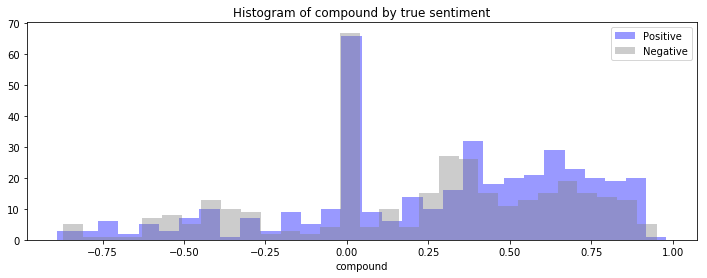

In [143]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("target==1")[var], bins=30, kde=False, 
                 color='blue', label='Positive')
    sns.distplot(train.query("target==0")[var], bins=30, kde=False, 
                 color='gray', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig("Plots/doge_"+str(var)+".png");

## Build a Predictive Model with RNN LSTM

In [144]:
# Import the Tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [145]:
# Create an instance of the Tokenizer and fit it with the X text data
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [146]:
# Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'the', token: 1
word: 'a', token: 2
word: 'of', token: 3
word: 'chars', token: 4
word: 'to', token: 5


In [147]:
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)

In [148]:
# Contrast a sample numerical sequence with its text version
print("**Text comment**")
print({X[0]})

**Text comment**
{'Jackson Palmer, creator of Dogecoin, in San Francisco on Friday. He was an early fan of cryptocurrency, but is now one of the loudest voices warning of a crash in the market.\n\nJackson Palmer no longer thinks it’s funny to imitate Doge, the internet m ... [+8465 chars]'}


In [149]:
print("**Numerical sequence representation**")
print(X_seq[0])

**Numerical sequence representation**
[448, 482, 511, 3, 8, 7, 886, 1523, 9, 291, 41, 20, 29, 253, 537, 3, 15, 56, 10, 39, 59, 3, 1, 2504, 3822, 3823, 3, 2, 1874, 7, 1, 27, 448, 482, 126, 1524, 1299, 192, 2505, 5, 3824, 26, 1, 260, 413, 3825, 4]


In [150]:
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the pad size
max_words = 140

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")

In [151]:
# Creating training, validation, and testing sets using the encoded data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [152]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [153]:
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 64

In [154]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=280))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

In [155]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [156]:
# Show model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 64)           473984    
_________________________________________________________________
lstm_2 (LSTM)                (None, 280)               386400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 281       
Total params: 860,665
Trainable params: 860,665
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Training the model
batch_size = 1000
epochs = 10
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6926 - accuracy: 0.5350 - tp: 397.0000 - tn: 0.0000e+00 - fp: 345.0000 - fn: 0.0000e+00 - precision: 0.5350 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.6971 - val_accuracy: 0.4839 - val_tp: 120.0000 - val_tn: 0.0000e+00 - val_fp: 128.0000 - val_fn: 0.0000e+00 - val_precision: 0.4839 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6907 - accuracy: 0.5350 - tp: 397.0000 - tn: 0.0000e+00 - fp: 345.0000 - fn: 0.0000e+00 - precision: 0.5350 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.7028 - val_accuracy: 0.4839 - val_tp: 120.0000 - val_tn: 0.0000e+00 - val_fp: 128.0000 - val_fn: 0.0000e+00 - val_precision: 0.4839 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.6915 - accuracy: 0.5350 - tp: 397.0000 - tn: 0.0000e+00 - fp: 345.0000 - fn: 0.0000e+00 - precision: 0.5350 - recall: 1.0000 - auc: 0.5000 

In [158]:
# Predict classes using the testing data
y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=1000)

## Model Comparison 

In [159]:
# Import relevant libraries from sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [160]:
#VADER - polarity model
train['vader_polarity'] = np.where(train['pos']>train['neg'], 1, 0)
target_names=['negative', 'positive']
print("Classification Report for the VADER Sentiment Model using polarity scores")
print(classification_report(train['target'], 
                            train['vader_polarity'], 
                            target_names=target_names))

Classification Report for the VADER Sentiment Model using polarity scores
              precision    recall  f1-score   support

    negative       0.49      0.39      0.44       344
    positive       0.55      0.65      0.60       398

    accuracy                           0.53       742
   macro avg       0.52      0.52      0.52       742
weighted avg       0.53      0.53      0.52       742



In [161]:
#VADER - compound model
train['vader_compound'] = np.where(train['compound']>0, 1, 0)
print("Classification Report for the VADER Sentiment Model using compound scores")
print(classification_report(train['target'], 
                            train['vader_compound'], 
                            target_names=target_names))

Classification Report for the VADER Sentiment Model using compound scores
              precision    recall  f1-score   support

    negative       0.49      0.38      0.43       344
    positive       0.55      0.65      0.60       398

    accuracy                           0.53       742
   macro avg       0.52      0.52      0.51       742
weighted avg       0.52      0.53      0.52       742



In [162]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.52      0.69       330

    accuracy                           0.52       330
   macro avg       0.50      0.26      0.34       330
weighted avg       1.00      0.52      0.69       330



## Confusion Matrices

In [163]:
# Create function we can call for all models
def plot_cm(y_test, y_pred, target_names=['negative', 'positive'], 
            figsize=(5,3)):
    """Create a labelled confusion matrix plot."""
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False, 
                ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted')
    ax.set_xticklabels(target_names)
    ax.set_ylabel('Actual')
    ax.set_yticklabels(target_names, 
                       fontdict={'verticalalignment': 'center'});

Confusion Matrix from the VADER model using polarity scores


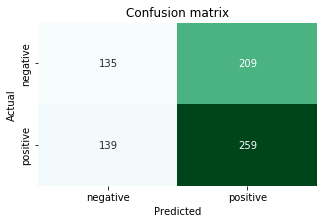

In [164]:
# Plot confusion matrix for VADER using polarity scores
print("Confusion Matrix from the VADER model using polarity scores")
plot_cm(train['target'], train['vader_polarity'])

Confusion Matrix from the VADER model using compound scores


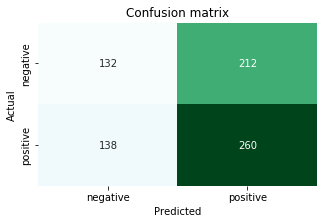

In [165]:
print("Confusion Matrix from the VADER model using compound scores")
plot_cm(train['target'], train['vader_compound'])

Confusion Matrix from the RNN LSTM Model


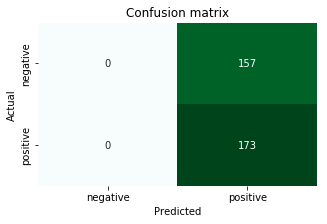

In [166]:
print("Confusion Matrix from the RNN LSTM Model")
plot_cm(y_test_rnn, y_rnn_pred)